In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Ejercicio de clasificación para entregar

Vamos a trabajar con el dataset de vinos proveniente de [Kaggle](https://www.kaggle.com/datasets/rakeshrau/social-network-ads). El dataset contiene proviene con datos de campaña de publicidad en una red social. Se cuenta con variables de los usuarios que tuvieron sujetos a la campaña. Se busca poder predecir dado un usuario con datos socioseconomicos si va a comprar o no el producto.

OBS: Completar las celdas vacias o las que estan incompletas si se observa `____` es para que completen.

In [ ]:
# Leemos el dataset
social_df = pd.read_csv("Social_Network_Ads.csv")

Vamos realizando los diferentes puntos pedidos en el ejercicio.

1. Lea el dataset como un DataFrame de Pandas. Realice un estudio de variables. Como se llaman y que están midiendo exactamente. Además, analice que tipo de variables son, cuál es el rango de estas variables y cómo se distribuyen (histograma).

Vemos las primeras cinco filas del dataset

In [ ]:
social_df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


Los atributos del dataset son:
- `User ID`: Cada persona tiene una identificación única a partir de la cual podemos identificarla de forma única.

- `Gender`: Es el genero de la persona. El producto puede ser interesante dependiendo del genero.

- `Age`: Edad de la persona. Porque el producto puede ser útil solo para algunas edades.

- `EstimatedSalary`: Esta columna contiene el salario de una persona, ya que el salario puede afectar las compras de una persona.

Y la columna a predecir es:
- `Purchased`: Contiene dos números "0" o "1". '0' significa no comprado y '1' significa comprado.

In [ ]:
# Veamos una descripción de todas las columnas, que tipo de columna es y si hay datos faltantes
social_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


Tenemos 2 columnas de tipo entero, 2 columnas de tipo flotante y 1 es una columna de strings.

No hay datos nulos.

La columna User ID es una columna que identifica a los usuarios, en el contexto del objetivo que estamos buscando, no nos sirve, por lo que vamos a eliminarla.

In [ ]:
social_df.drop(columns="User ID", inplace=True)

Veamos ahora la distribución de los datos

In [ ]:
social_df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19.0,19000.0,0
1,Male,35.0,20000.0,0
2,Female,26.0,43000.0,0
3,Female,27.0,57000.0,0
4,Male,19.0,76000.0,0


Veamos los histogramas de los atributos numericos

[]

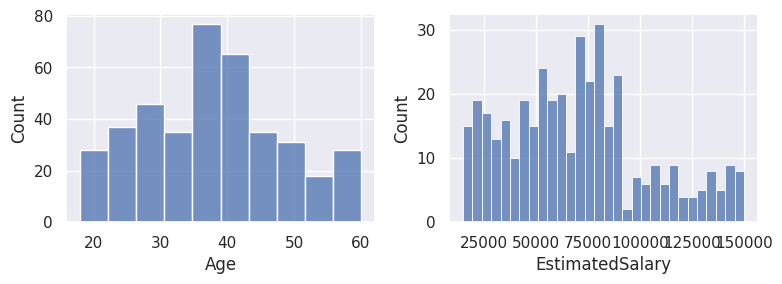

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
sns.histplot(data=social_df, x="Age", ax=ax[0], bins=10)
sns.histplot(data=social_df, x="EstimatedSalary", ax=ax[1], bins=30)
plt.tight_layout()
plt.plot()

De los histogramas de los atributos, vemos que en edad tenemos una distribución uniforme hasta llegar a aproximadamente los 35 años, ahi estan la mayoria de los usuarios entre 35 y 45, luego tenemos en una distribución uniforme de edades hasta llegar a los 60 pero en menor cantidad de usuarios.

Por otro lado, el salario, tenemos una distribución uniforme entre 25000 y 100000 y luego otra en mucho menor tamaño entre 100000 y 150000. Es decir, la mayoria de los usarios ganan entre 25000 y 100000.

Veamos la distribución del género:

In [ ]:
social_df["Gender"].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

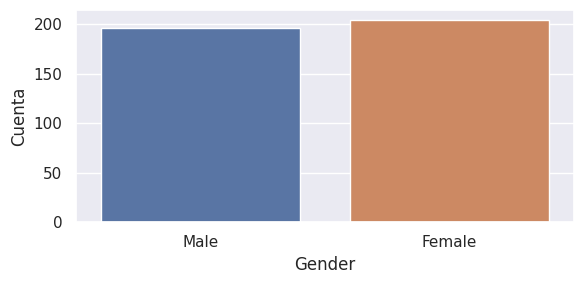

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
sns.countplot(data=social_df, x="Gender", ax=ax);
ax.set_ylabel("Cuenta")
plt.tight_layout();

Vemos que en este dataset tenemos dos generos y estos presentan una distribución bastante pareja

2. Genere gráficos de cajas de los diferentes atributos separando por clase (compro o no el producto). Entre los atributos, se observa alguna diferencia en lo gráficos de cajas?

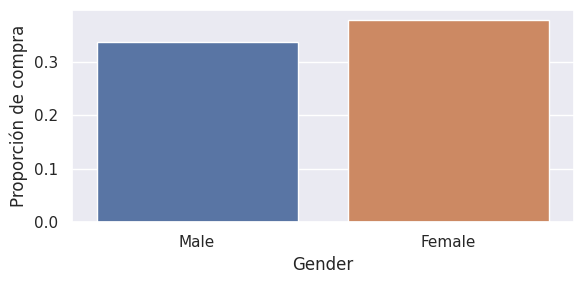

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
sns.barplot(data=social_df, y="Purchased", x="Gender", errorbar=None)
ax.set_ylabel("Proporción de compra");
plt.tight_layout();

Vemos que hay mas mujeres que compran que hombres para esta campaña, aunque la diferencia es muy poca.

Vemos el grafico de caja de las demas variables

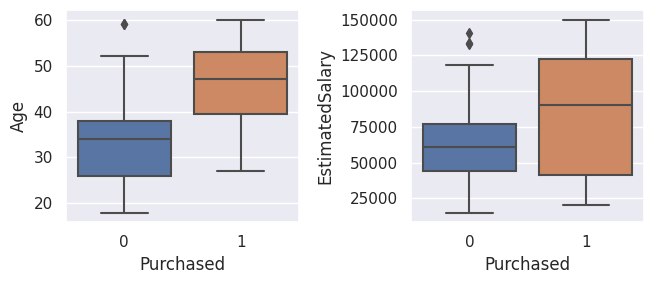

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(6.7, 3))
sns.boxplot(data=social_df, x="Purchased", y="Age", ax=ax[0])
sns.boxplot(data=social_df, x="Purchased", y="EstimatedSalary", ax=ax[1])
plt.tight_layout();

Vemos que la edad es un atributo que marca muy fuerte quien compra o no el producto. Por otro lado, el salario estimado vemos que los que no compran tienen un salario menor y con menos variación.

3. Analize las clases, estan balanceadas, o no? Qué clase nos parece mas importante de las dos?

In [ ]:
social_df["Purchased"].value_counts(normalize=True)

0    0.6425
1    0.3575
Name: Purchased, dtype: float64

Un 65% aproximadamente no compro y 35% si compro. Lo cual es una buena distribución, no tenemos un gran desbalance de clases.

4. Separe el dataset en entrenamiento y validación. Utilice 70%-30%.

Previo a esto vamos a transformar a la variable genero en numerica usando codificación dummy

In [ ]:
social_df =pd.get_dummies(social_df, columns=["Gender"], drop_first=True)
# Reacomodamos la columna para dejar al final el target
# Esto no es obligatorio pero deja mas prolijo a nuestro dataset.
social_df = social_df[['Age', 'EstimatedSalary', 'Gender_Male', 'Purchased']]

In [ ]:
# Obtenemos a X e y. Recordar que X debe ser un array de dos dimensiones
X = social_df.drop(columns="Purchased").values
y = social_df["Purchased"].values

print(f"La forma de X es {X.shape}")
print(f"La forma de y es {y.shape}")

La forma de X es (400, 3)
La forma de y es (400,)


In [ ]:
# Separamos el dataset en training y test
from sklearn.model_selection import train_test_split

# Usamos el argumento opcional para que se mantenga la proporcion en los conjuntos de entrenamiento y testeo.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42, stratify=y)

# Vamos a escalar a todas la entradas para no tener problemas de escala en el modelo
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train) # usamos fit para crear el escalado y aplicar conjunto de entrenamiento
X_test = sc_X.transform(X_test) # solo hacemos el transform ya que fue escalado anteriormente

5. Determine que métrica se va a usar para evaluar la calidad de los modelos. Tenga en cuenta el balanceo de clases, y que objetivo se busca tener (por ejemplo, queremos predecir las mayor cantidad de personas que compran a expensas de tener falsos positivos o tener mucha seguridad a la hora de decir que una persona compra a expensa de tener falsos negativos).

(OBS: Esta decisiones son tomadas para esta guia, pero ustedes pueden elegir otras metricas y decisiones)

En nuestro caso nos interesa saber más quienes compran de los que no. No es que para nada importante los usuarios que no compran, pero nos importa más quienes, asi podemos determinar un perfil socioeconomico de los usuarios que compran le producto. Por lo que queremos que el modelo cuando diga que la persona compra, es muy seguro que si lo hace. Esto es porque asi podemos armar un buen perfil socioeconomico del mismo.

Entonces, vamos a usar la matriz de confusión y el score F0.5 que le da mas pesos a la precision que a la recuperación.

6. Construya un modelo de regresión logística, el cual se intente predecir si una persona compró el producto o no.

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = 0)

# 1. Entrene el modelo con el set de entrenamiento.
logistic.fit(X_train, y_train)

# 2. Evalúe el modelo con la métrica de evaluación.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, fbeta_score, precision_score, recall_score

y_pred = logistic.predict(X_test)
precision = precision_score(y_test, y_pred)
specificity = recall_score(y_test, y_pred)
f0_5_logistic = fbeta_score(y_test, y_pred, zero_division=0, beta=0.5)

print(f"F0.5-score: {f0_5_logistic:.3f}")
print(f"precision: {precision:.3f}")
print(f"Especificidad: {specificity:.3f}")

F0.5-score: 0.792
precision: 0.829
Especificidad: 0.674


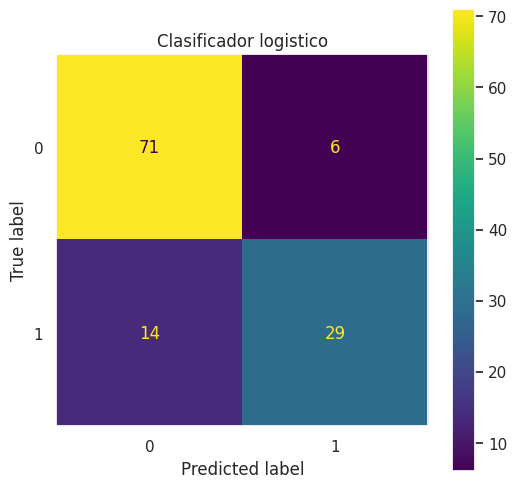

In [ ]:
cm_logistic = confusion_matrix(y_test, logistic.predict(X_test))

disp = ConfusionMatrixDisplay(confusion_matrix=cm_logistic,
                              display_labels=logistic.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Clasificador logistico");

(Opcional) Cree una curva ROC para evaluar el modelo para ver la calidad del modelo, sin depender del valor umbral. Elija un valor umbral que considere más optimo (usando AUC) y vuelva a clasificar usando ese valor.

Este punto no lo realizamos ya que es opcional. Si lo hacen, tienen mas puntos, pero sin ayuda en este caso

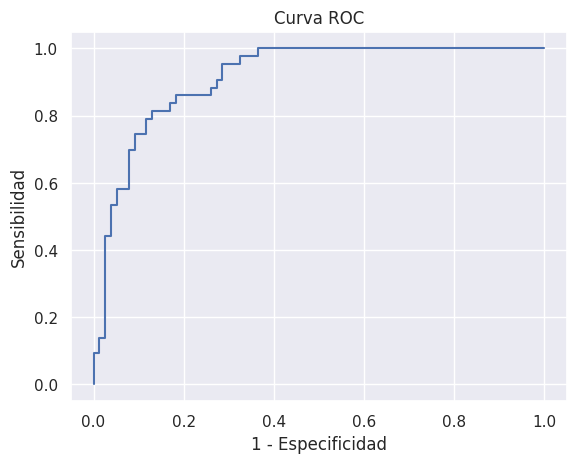

In [ ]:
from sklearn.metrics import roc_curve, auc

# Obtenemos las probabilidades predichas
probs = logistic.predict_proba(X_test)

# Creamos la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])

# Calculamos el AUC
auc = auc(fpr, tpr)

# Graficamos la curva ROC
plt.plot(fpr, tpr)
plt.xlabel("1 - Especificidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC")
plt.show()


7. Construya un modelo de KNN, el cual se intente predecir si una persona compró el producto o no.

In [ ]:
# 1. Este modelo se debe definir el numero de vecinos. Cree 4 modelos con K = 1, 3, 5 y 13
from sklearn.neighbors import KNeighborsClassifier

# Elegimos la distancia euclideana
classifier_knn_1 = KNeighborsClassifier(n_neighbors=1, metric="euclidean")
classifier_knn_3 = KNeighborsClassifier(n_neighbors=3, metric="euclidean")
classifier_knn_5 = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
classifier_knn_13 = KNeighborsClassifier(n_neighbors=13, metric="euclidean")

# 2. Entrene los modelos con el set de entrenamiento.
classifier_knn_1.fit(X_train, y_train)
classifier_knn_3.fit(X_train, y_train)
classifier_knn_5.fit(X_train, y_train)
classifier_knn_13.fit(X_train, y_train)

# 3. Evalúe los modelos con la métrica de evaluación.
y_pred_knn_1 = classifier_knn_1.predict(X_test)
y_pred_knn_3 = classifier_knn_3.predict(X_test)
y_pred_knn_5 = classifier_knn_5.predict(X_test)
y_pred_knn_13 = classifier_knn_13.predict(X_test)

f0_5_knn_1 = fbeta_score(y_test, y_pred_knn_1, zero_division=0, beta=0.5)
f0_5_knn_3 = fbeta_score(y_test, y_pred_knn_3, zero_division=0, beta=0.5)
f0_5_knn_5 = fbeta_score(y_test, y_pred_knn_5, zero_division=0, beta=0.5)
f0_5_knn_13 = fbeta_score(y_test, y_pred_knn_13, zero_division=0, beta=0.5)



print(f"F0.5-score de KNN con 1 vecino: {f0_5_knn_1}")
print(f"F0.5-score de KNN con 3 vecinos: {f0_5_knn_3}")
print(f"F0.5-score de KNN con 5 vecinos: {f0_5_knn_5}")
print(f"F0.5-score de KNN con 13 vecinos: {f0_5_knn_13}")


precision = precision_score(y_test, y_pred_knn_5)
specificity = recall_score(y_test, y_pred_knn_5)
print("Precisión de KNN con 5 vecinos::", precision)
print("Especificidad de KNN con 5 vecinos::", specificity)

F0.5-score de KNN con 1 vecino: 0.8454106280193237
F0.5-score de KNN con 3 vecinos: 0.8604651162790697
F0.5-score de KNN con 5 vecinos: 0.8744394618834082
F0.5-score de KNN con 13 vecinos: 0.8675799086757993
Precisión de KNN con 5 vecinos:: 0.8666666666666667
Especificidad de KNN con 5 vecinos:: 0.9069767441860465


Vemos que el mejor modelo de los cuatro es el de 5 vecinos. Obtengamos la matriz de confusión de este modelo.

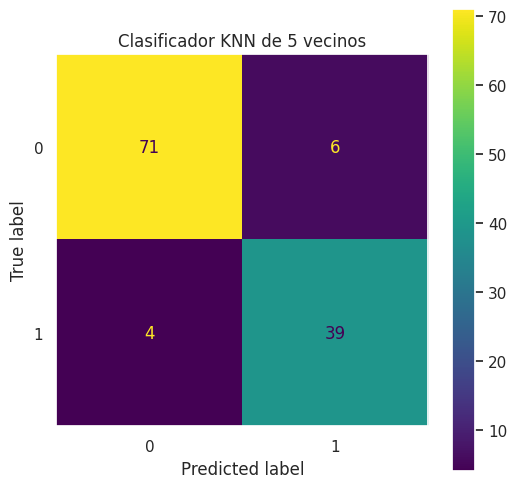

In [ ]:
cm_knn = confusion_matrix(y_test, y_pred_knn_5)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn,
                             display_labels=classifier_knn_5.classes_)


fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Clasificador KNN de 5 vecinos");

5. Compare el mejor modelo de regresión logistica y el mejor modelo de KNN. Cual fue el mejor modelo? Discuta los resultados.

El modelo KNN es mas preciso ya que es capaz de predecir  correctamente el 87.44% de las instancias negativas. El modelo KNN es un modelo no lineas que predoce la clases de una instancia en funcion a las clases de las instancias más cercanas
